In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
%matplotlib inline

Using TensorFlow backend.


In [3]:
from google.colab import files
dataset = files.upload()

Saving R5 Epoch 4 EO long (11s).txt_copy.csv to R5 Epoch 4 EO long (11s).txt_copy.csv


In [0]:
dataset = pd.read_csv('R5 Epoch 4 EO long (11s).txt_copy.csv', index_col=0)
df = pd.DataFrame(dataset)

In [5]:
df.head(10)

,C3-CZ,C3-P3,C4-CZ,C4-P4,CZ-PZ,F3-C3,F3-FZ,F4-C4,F4-FZ,F7-F3,F8-F4,FZ-CZ,O1-O2,P3-O1,P3-PZ,P4-O2,P4-PZ,T3-C3,T3-T5,T4-C4,T4-T6,T5-O1,T6-O2
Time,,,,,,,,,,,,,,,,,,,,,,,
0.0000,-10.734375,-17.157791,7.657227,-0.975586,-7.837891,-12.718750,-9.058350,-33.373047,-11.320801,-21.253662,8.659180,-14.395020,1.813477,-0.666992,0.794922,3.355957,0.794922,9.808655,-2.595703,-13.646362,-8.693359,-5.420837,-2.572144
0.0005,-11.359374,-14.595416,2.896978,-9.467520,-10.506101,-14.901854,-6.491214,-29.600101,-6.933232,-18.451420,9.959472,-19.769526,1.380860,-2.395506,1.858397,8.113765,1.858397,10.277465,-3.283202,-24.136097,-24.465803,-3.430178,-1.023683
0.0010,-16.240223,-11.537742,-0.234856,-6.777349,-0.967306,-16.006834,-10.852285,-24.768564,-3.609138,-13.521983,5.914559,-21.394527,-1.141596,-5.701165,5.575187,4.402352,5.575187,10.775832,-2.377932,-23.502810,-25.371092,-4.084471,-0.506837
0.0015,-20.041004,-16.417282,-0.183594,-0.362814,-2.053952,-17.687494,-15.221665,-38.552200,-16.228474,-5.411159,13.046852,-22.507565,0.584955,-4.238286,-1.874976,0.149428,-1.874976,14.991137,1.191395,-13.346591,-14.620152,-6.855338,1.060053
0.0020,-18.000986,-15.456760,0.417478,-3.499498,-4.732166,-8.698770,-4.687302,-34.298847,-11.869160,-10.085429,9.555679,-22.012453,-1.440421,-5.956047,-0.814946,-0.936030,-0.814946,17.618366,0.508792,-19.191381,-16.154291,-4.303112,-7.473351
0.0025,-10.102094,-12.897704,1.548822,-1.358166,-5.296872,-9.843255,-2.688243,-31.136736,-12.331174,-14.202859,10.892082,-17.257107,-0.279303,0.831018,-2.390128,0.662101,-2.390128,16.531713,4.619118,-7.550966,-9.269568,-0.154075,1.023391
0.0030,-0.064518,-9.807149,-1.593241,-7.211388,-8.536356,4.412017,20.046238,-18.936604,-4.831470,-37.989101,4.806192,-15.698497,1.940415,2.317373,-2.918454,0.134281,-2.918454,6.400151,0.771509,-4.940813,-9.862301,-1.861378,-2.156595
0.0035,-9.702563,-16.823296,-0.461923,-2.950228,-8.578125,29.854788,36.407101,-23.721643,-7.928810,-53.268440,9.843712,-16.254879,-0.098617,0.076189,-6.090308,-4.654261,-6.090308,11.693747,2.789047,-2.293721,-2.429744,-7.842484,-7.468343
0.0040,-5.525427,-7.355810,-5.694291,-5.595192,-6.489520,3.192126,22.449827,-21.056664,-1.967703,-31.318062,12.730444,-24.783129,5.303664,-1.116201,-6.588863,2.257753,-6.588863,5.840245,-3.157175,-4.409039,-5.591769,0.525074,-2.154953


In [6]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 22006 entries, 0.0 to 11.0025
Data columns (total 23 columns):
C3-CZ    22006 non-null float64
C3-P3    22006 non-null float64
C4-CZ    22006 non-null float64
C4-P4    22006 non-null float64
CZ-PZ    22006 non-null float64
F3-C3    22006 non-null float64
F3-FZ    22006 non-null float64
F4-C4    22006 non-null float64
F4-FZ    22006 non-null float64
F7-F3    22006 non-null float64
F8-F4    22006 non-null float64
FZ-CZ    22006 non-null float64
O1-O2    22006 non-null float64
P3-O1    22006 non-null float64
P3-PZ    22006 non-null float64
P4-O2    22006 non-null float64
P4-PZ    22006 non-null float64
T3-C3    22006 non-null float64
T3-T5    22006 non-null float64
T4-C4    22006 non-null float64
T4-T6    22006 non-null float64
T5-O1    22006 non-null float64
T6-O2    22006 non-null float64
dtypes: float64(23)
memory usage: 4.0 MB


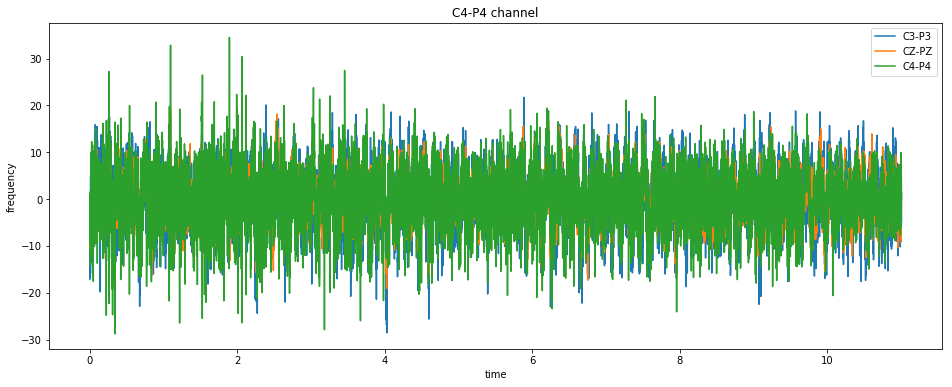

In [7]:
plt.figure(figsize=(16,6))

#Plot for the C3-P3, C4-P4 and CZ-PZ channel
plt.title("C3-P3 channel")
sns.lineplot(data = df['C3-P3'], label="C3-P3")
plt.title("CZ-PZ channel")
sns.lineplot(data = df['CZ-PZ'], label="CZ-PZ")
plt.title("C4-P4 channel")
sns.lineplot(data = df['C4-P4'], label="C4-P4")
plt.xlabel("time")
plt.ylabel("frequency")
plt.legend()

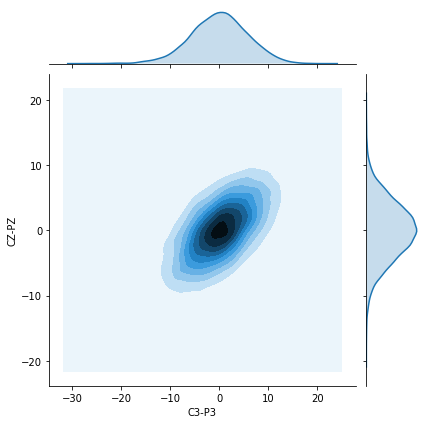

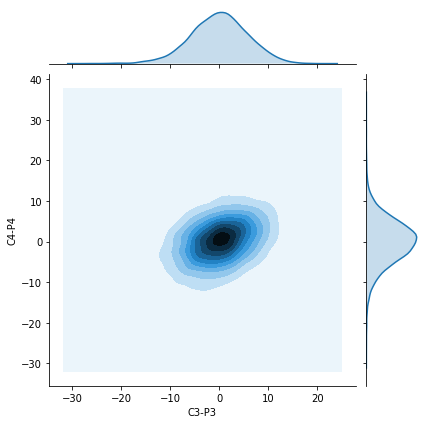

In [11]:
#Plotting the KDE chart for each of the two channel pairs
sns.jointplot(x = df['C3-P3'], y = df['CZ-PZ'], kind = "kde")
sns.jointplot(x = df['C3-P3'], y = df['C4-P4'], kind = "kde")

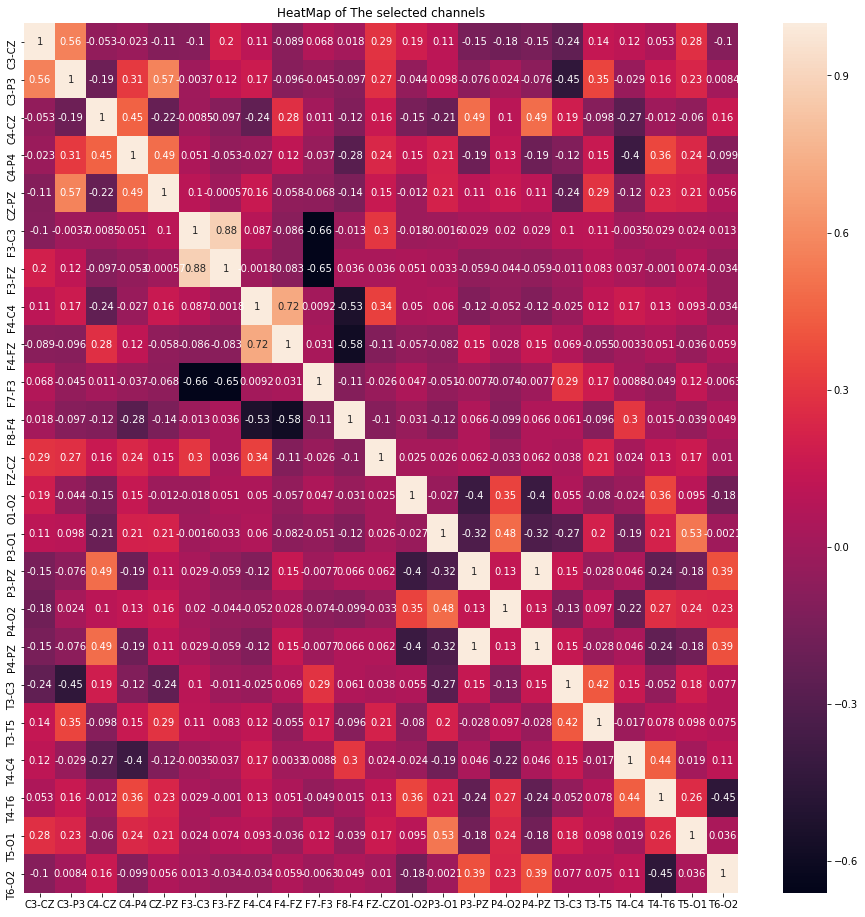

In [14]:
#Plotting the heatmap for detecting the correlations among the dataset

#Obtaining the correlations among the dataset
C_mat = df.corr()
plt.figure(figsize=(16,16))
plt.title("HeatMap of The selected channels")
sns.heatmap(data= C_mat, annot=True)
plt.show()

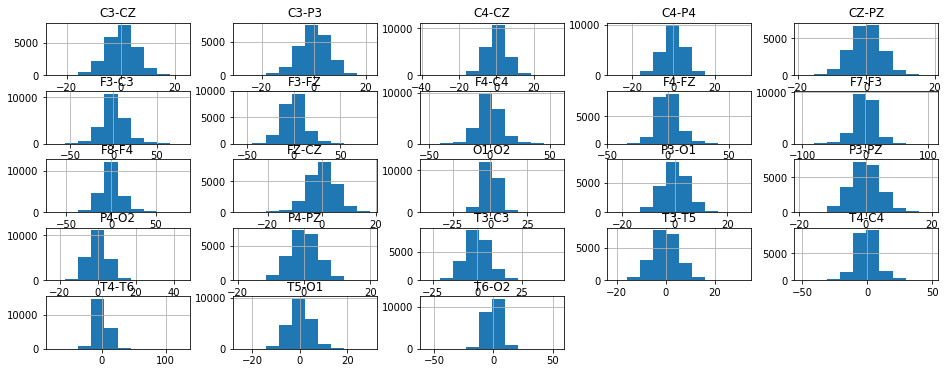

In [16]:
#Plotting the Histogram of all the channels
df.hist(figsize = (16,6))
plt.show()

In [9]:
selected_channels = df.iloc[:, 1:5]
print(selected_channels.info())

<class 'pandas.core.frame.DataFrame'>
Float64Index: 22006 entries, 0.0 to 11.0025
Data columns (total 4 columns):
C3-P3    22006 non-null float64
C4-CZ    22006 non-null float64
C4-P4    22006 non-null float64
CZ-PZ    22006 non-null float64
dtypes: float64(4)
memory usage: 859.6 KB
None


In [0]:
from sklearn.model_selection import train_test_split 
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.python.keras.callbacks import TensorBoard
from sklearn.preprocessing import StandardScaler 
import datetime
import os
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [0]:
train, test = train_test_split(df, test_size=0.2, random_state=14)

In [21]:
print(str(train.shape) + "\n" + str(test.shape))

(17604, 23)
(4402, 23)


In [26]:
train.shape[1]

23

In [31]:
#Building a simple Deep Neural Network
NN_model = Sequential()



# The Input Layer :

NN_model.add(Dense(128, kernel_initializer='normal',input_dim = 23, activation='relu'))



# The Hidden Layers :

NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))



# The Output Layer :

NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))



# Compile the network :

NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               3072      
_________________________________________________________________
dense_12 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 257       
Total params: 167,937
Trainable params: 167,937
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Creating a checkpoint callback
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 

checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')

callbacks_list = [checkpoint]

In [0]:
#Compiling the model
#NN_model.fit(train, epochs=500, batch_size=32, validation_split = 0.2)

In [0]:
#The CNN model for processing the dataset
def create_model(lr=1e-4, beta1=0.7, r=0.25, reg = 0.01, subject=False):

    #r = 0.2
    n_filters = [32, 32, 64, 128, 256]
    n_filters = [2*n for n in n_filters]

    s = 1
    
    model = tf.keras.Sequential()

    # conv1
    model.add(layers.Conv2D(n_filters[0], (1,10//s), (1,2), 'valid', input_shape=X_train_valid[0].shape))
    model.add(layers.ReLU())
    model.add(layers.Conv2D(n_filters[1], (22, 1), (1,1), 'valid'))
    #model.add(layers.ReLU())
    model.add(layers.ELU())
    #model.add(layers.MaxPool2D((1,3), (1,3)))
    model.add(layers.AveragePooling2D((1,3), (1,3)))
    model.add(layers.Dropout(r))
    model.add(layers.Permute((3,2,1)))


    # conv2
    model.add(layers.Conv2D(n_filters[2], (n_filters[1], 10//s), (1,1), 'valid'))
    model.add(layers.Permute((3,2,1)))
    #model.add(layers.ReLU())
    model.add(layers.BatchNormalization())
    model.add(layers.ELU())
    #model.add(layers.MaxPool2D((1,3), (1,3)))
    model.add(layers.AveragePooling2D((1,3), (1,3)))
    model.add(layers.Dropout(r))

    # conv3
    model.add(layers.Conv2D(n_filters[3], (n_filters[2], 10//s), (1,1), 'valid'))
    model.add(layers.Permute((3,2,1)))
    #model.add(layers.ReLU())
    model.add(layers.BatchNormalization())
    model.add(layers.ELU())
    #model.add(layers.MaxPool2D((1,3), (1,3)))
    model.add(layers.AveragePooling2D((1,3), (1,3)))
    model.add(layers.Dropout(r))

    # conv4
    model.add(layers.Conv2D(n_filters[4], (n_filters[3], 10//s), (1,1), 'valid'))
    model.add(layers.Permute((3,2,1)))
    #model.add(layers.ReLU())
    model.add(layers.BatchNormalization())
    model.add(layers.ELU())
    #model.add(layers.MaxPool2D((1,3), (1,3), 'same'))
    model.add(layers.AveragePooling2D((1,3), (1,3), 'same'))
    model.add(layers.Dropout(r))

    # dense
    model.add(layers.Flatten())
    #model.add(layers.Dense(128, activation='relu'))
    
    if subject:
        model.add(layers.Dense(9, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(l=reg)))
    else:
        model.add(layers.Dense(4, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(l=reg)))

    model.compile(optimizer=tf.train.AdamOptimizer(lr, beta1),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()
    
    return model